In [30]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("merged_data/final_merged.csv")
print(df.describe())
print(df.info())

             budget      runtime      screens  opening_week  \
count  3.008000e+03  3008.000000  3008.000000  3.008000e+03   
mean   4.937433e+07   109.340093  2448.171875  1.853001e+07   
std    5.158096e+07    17.775276  1139.896276  2.612501e+07   
min    7.000000e+03    68.000000     1.000000  1.450000e+03   
25%    1.500000e+07    96.000000  1792.000000  3.604586e+06   
50%    3.000000e+07   107.000000  2706.500000  1.101502e+07   
75%    6.500000e+07   119.000000  3230.000000  2.251831e+07   
max    4.000000e+08   219.000000  4662.000000  3.571150e+08   

       domestic_box_office      ratings     user_vote  critic_vote  \
count         3.008000e+03  3008.000000  3.008000e+03  3008.000000   
mean          6.307289e+07     6.335572  2.926924e+05   185.700798   
std           8.294543e+07     0.998941  1.484667e+06   101.092981   
min           2.139800e+04     1.500000  7.100000e+01     4.000000   
25%           1.468143e+07     5.800000  4.300000e+04   121.000000   
50%         

In [33]:
df.head(5)

,tt_id,rl_id,movie_name,mpaa,budget,runtime,screens,opening_week,domestic_box_office,ratings,user_vote,country,genres,critic_vote,meta_score,sequel,month,year
0,tt1179933,rl1329956353,10 Cloverfield Lane,PG-13,15000000.0,103.0,3427.0,24727437.0,72082999.0,7.2,355000.0,United States,Drama Horror Mystery Sci-Fi Thriller,358.0,88.32,0,3.0,2016.0
1,tt0443649,rl977372673,10000 BC,PG-13,105000000.0,109.0,3454.0,35867488.0,94784201.0,5.1,136000.0,United States South Africa,Action Adventure Drama Fantasy History,29.0,34.00,0,3.0,2008.0
2,tt0211181,rl927041025,102 Dalmatians,G,85000000.0,100.0,2704.0,19883351.0,66957026.0,4.8,40000.0,United States,Adventure Comedy Family,114.0,31.05,0,11.0,2000.0
3,tt1160368,rl440501761,12 Rounds,PG-13,20000000.0,108.0,2331.0,5329240.0,12234694.0,5.6,31000.0,United States,Action Crime Thriller,85.0,32.07,0,3.0,2009.0
4,tt1413492,rl2701166081,12 Strong,R,35000000.0,130.0,3018.0,15815025.0,45819713.0,6.5,92000.0,United States,Action Drama History War,216.0,50.80,0,1.0,2018.0


In [34]:
df.isnull().sum()



tt_id                  165
rl_id                  165
movie_name               0
mpaa                     0
budget                   0
runtime                  0
screens                  0
opening_week             0
domestic_box_office      0
ratings                  0
user_vote                0
country                  0
genres                   0
critic_vote              0
meta_score               0
sequel                   0
month                    0
year                     0
dtype: int64

In [35]:
row_count = df.shape[0]
print(row_count)

df = df[df["domestic_box_office"]>5000000]

row_count = df.shape[0]
print(row_count)


3008
2733


In [36]:
df=df[df['sequel']==1]
row_count = df.shape[0]
print(row_count)

173


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 37 to 3006
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tt_id                159 non-null    object 
 1   rl_id                159 non-null    object 
 2   movie_name           173 non-null    object 
 3   mpaa                 173 non-null    object 
 4   budget               173 non-null    float64
 5   runtime              173 non-null    float64
 6   screens              173 non-null    float64
 7   opening_week         173 non-null    float64
 8   domestic_box_office  173 non-null    float64
 9   ratings              173 non-null    float64
 10  user_vote            173 non-null    float64
 11  country              173 non-null    object 
 12  genres               173 non-null    object 
 13  critic_vote          173 non-null    float64
 14  meta_score           173 non-null    float64
 15  sequel               173 non-null    int64 

In [38]:
features_numerical = (
    df.select_dtypes(exclude=["object"]).copy()
)

In [39]:
features_numerical.columns

Index(['budget', 'runtime', 'screens', 'opening_week', 'domestic_box_office',
       'ratings', 'user_vote', 'critic_vote', 'meta_score', 'sequel', 'month',
       'year'],
      dtype='object')

In [40]:
features_categorical = df.select_dtypes(include=["object"]).copy()
features_categorical.columns

Index(['tt_id', 'rl_id', 'movie_name', 'mpaa', 'country', 'genres'], dtype='object')

In [41]:
features_numerical = features_numerical.drop("domestic_box_office", axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_24172\4072711137.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24172\4072711137.py:5: UserWarning: 

`distplot` is a deprecated function and will be remove

Error in callback <function _draw_all_if_interactive at 0x000001EBE74E5E40> (for post_execute):


KeyboardInterrupt: 

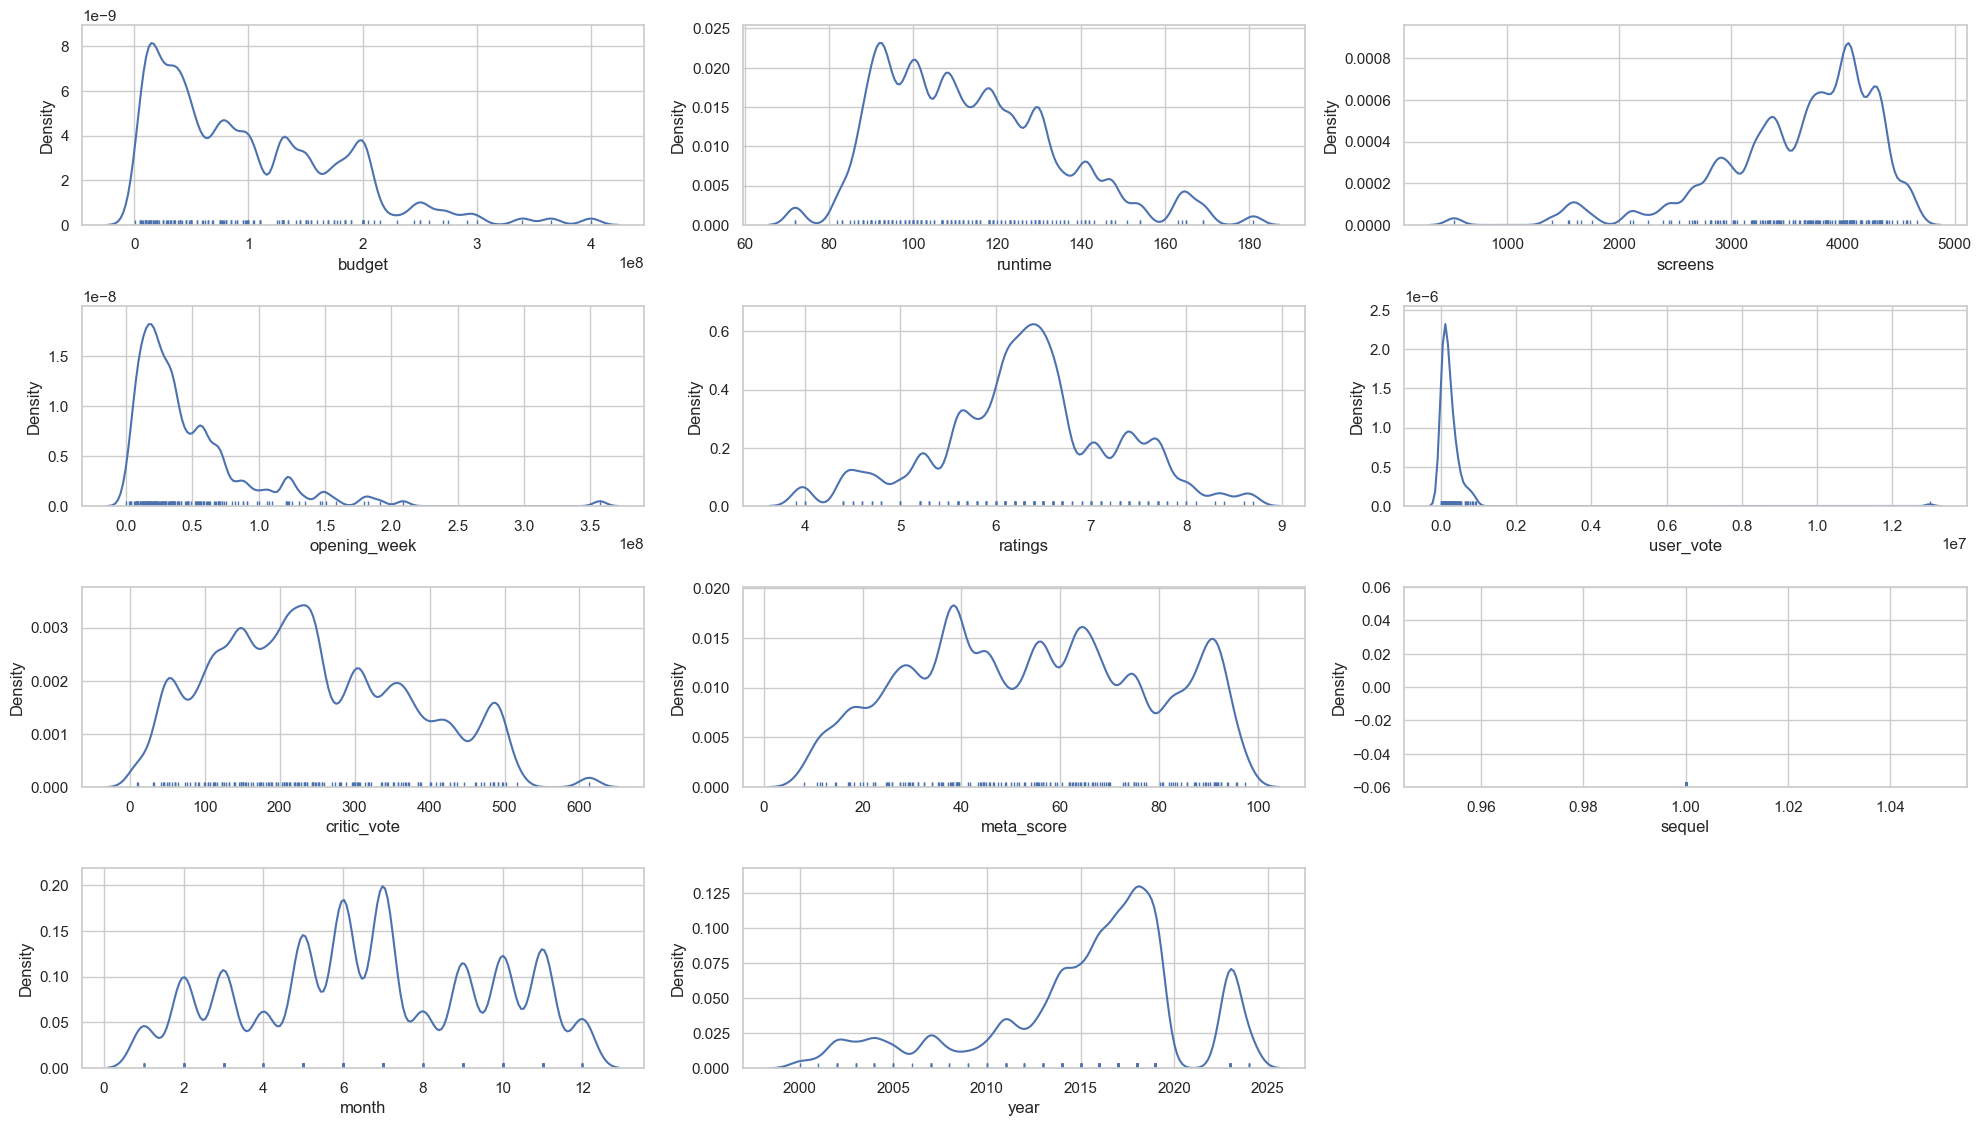

In [42]:
fig = plt.figure(figsize=(20, 25))
sns.set(style="whitegrid")
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 3, i + 1)
    sns.distplot(
        features_numerical.iloc[:, i].dropna(),
        rug=True,
        hist=False,
        kde_kws={"bw": 0.1},
        color="b",
    )
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

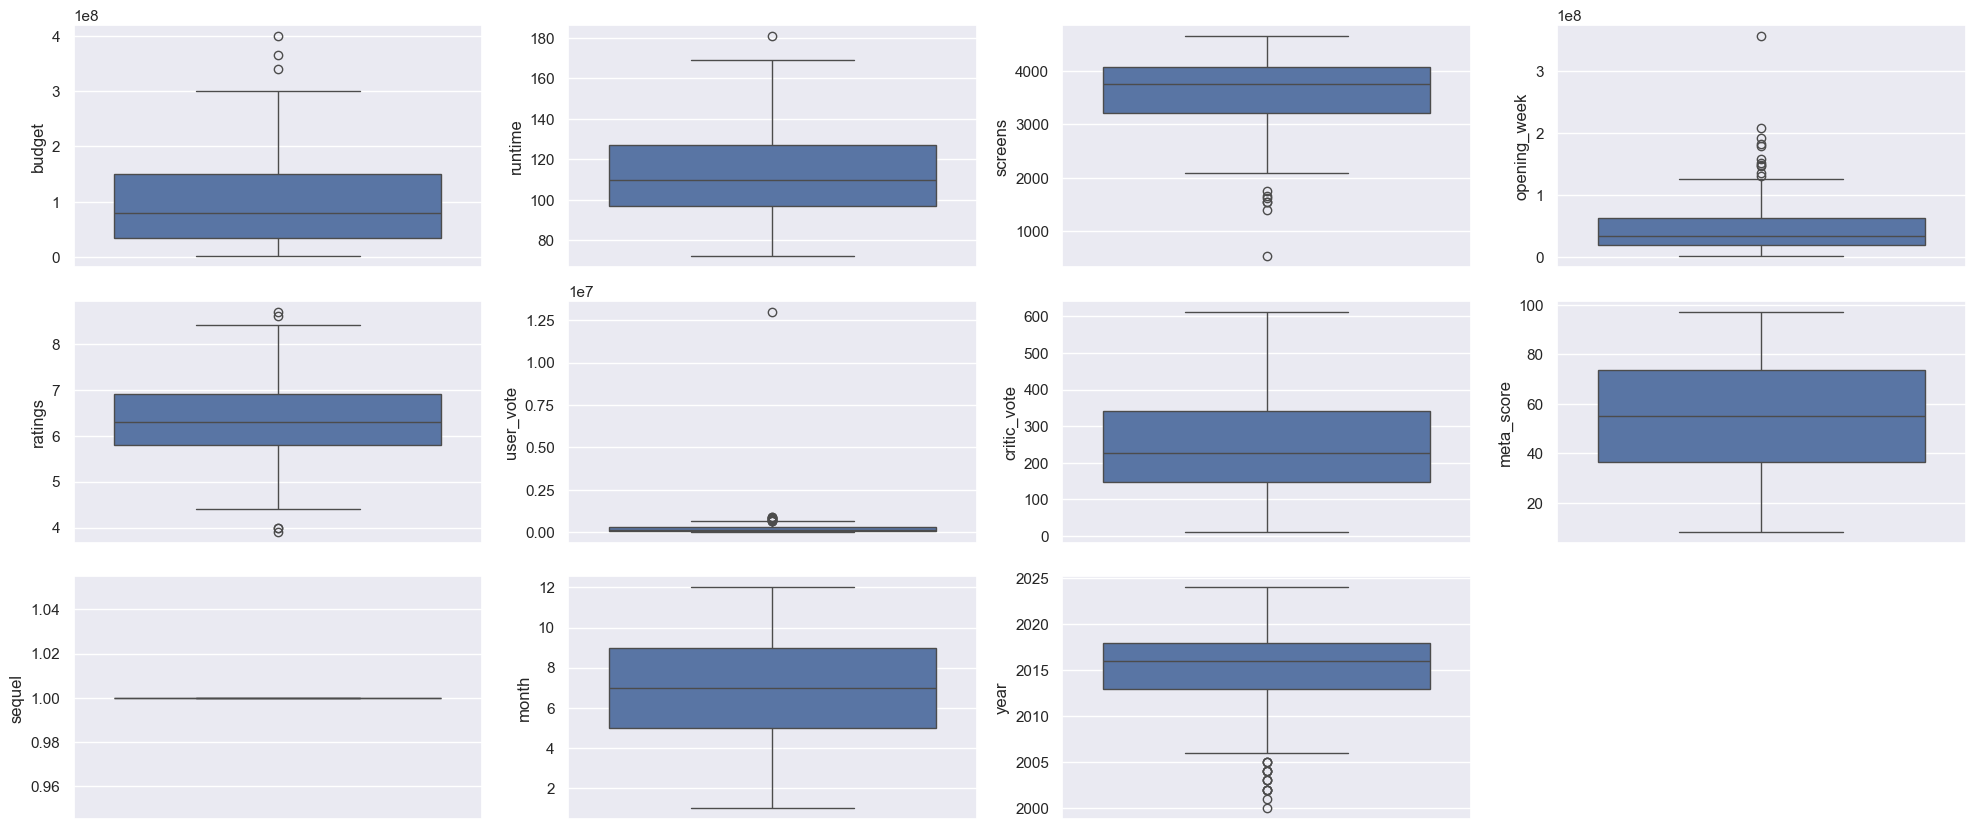

In [ ]:
fig = plt.figure(figsize=(20, 25))
sns.set(style="darkgrid")
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i + 1)
    sns.boxplot(y=features_numerical.iloc[:, i].dropna())
plt.tight_layout()

In [ ]:
outliers = df[["budget","runtime","screens","opening_week","meta_score","ratings"]]

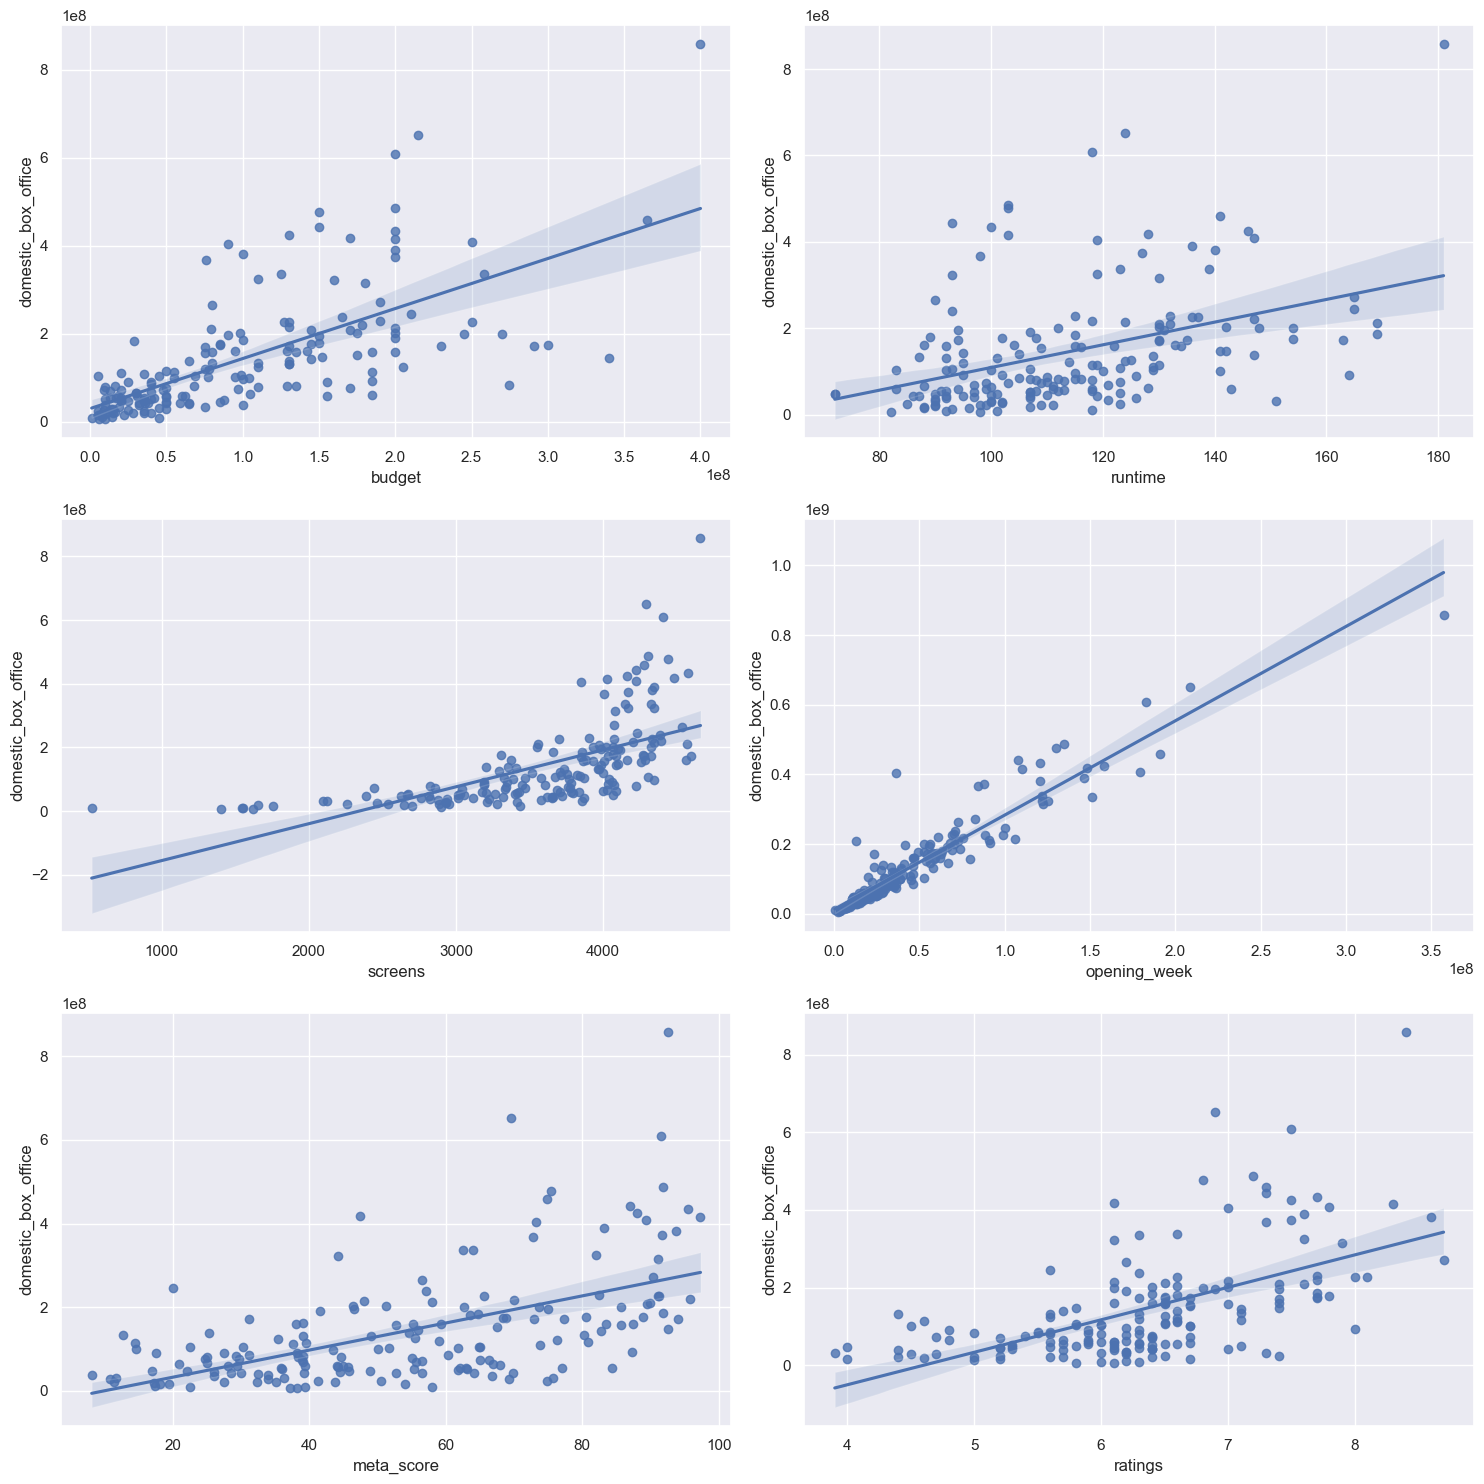

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    if i < len(outliers.columns):
        sns.regplot(x=outliers.iloc[:, i], y=df.domestic_box_office, ax=ax)

plt.tight_layout()
plt.show()

2019.0
Number of movie:  22
2011.0
Number of movie:  7
2016.0
Number of movie:  17
2017.0
Number of movie:  19
2012.0
Number of movie:  4
2018.0
Number of movie:  23
2023.0
Number of movie:  16
2015.0
Number of movie:  12
2003.0
Number of movie:  3
2014.0
Number of movie:  13
2013.0
Number of movie:  7
2002.0
Number of movie:  4
2007.0
Number of movie:  5
2009.0
Number of movie:  2
2008.0
Number of movie:  2
2004.0
Number of movie:  4
2010.0
Number of movie:  3
2006.0
Number of movie:  1
2005.0
Number of movie:  3
2001.0
Number of movie:  1


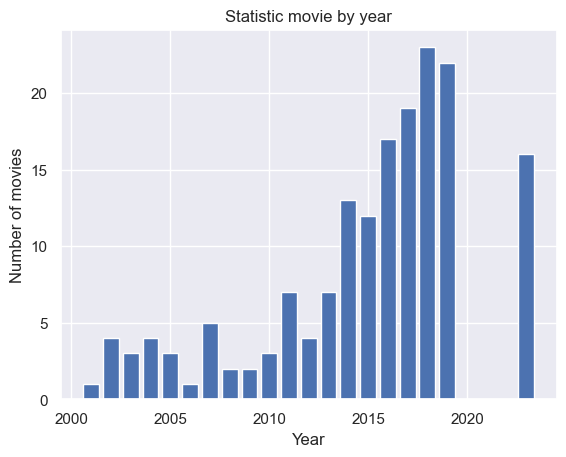

In [ ]:
df = df[(df["year"] >= 2001) & (df["year"] <= 2023)]
years=df['year'].unique()
number_movie = []
for y in years:
    print(y)
    print("Number of movie: ",df[df["year"] == y]["movie_name"].count())
    number_movie.append(df[df['year']==y]['movie_name'].count())
plt.bar(years, number_movie)
plt.title("Statistic movie by year")
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.show()

domestic_box_office
(0.0, 100000000.0]             81
(100000000.0, 200000000.0]     47
(200000000.0, 300000000.0]     18
(400000000.0, 500000000.0]     10
(300000000.0, 400000000.0]      9
(600000000.0, 700000000.0]      2
(800000000.0, 900000000.0]      1
(500000000.0, 600000000.0]      0
(700000000.0, 800000000.0]      0
(900000000.0, 1000000000.0]     0
Name: count, dtype: int64


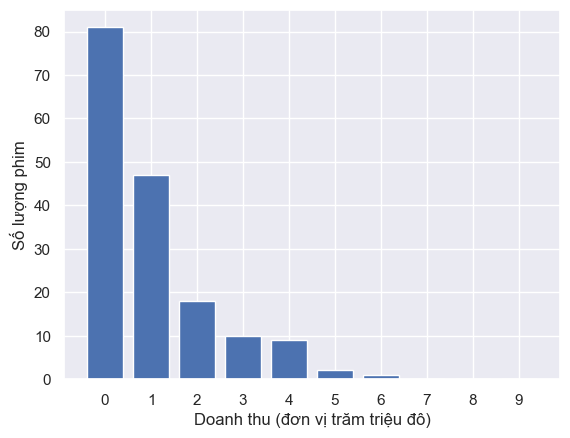

In [ ]:
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter


bins = [
    0,
    1e8,
    2e8,
    3e8,
    4e8,
    5e8,
    6e8,
    7e8,
    8e8,
    9e8,
    10e8
]  

categories = pd.cut(df["domestic_box_office"], bins)

revenue_counts = categories.value_counts()

print(revenue_counts)

plt.bar([str(cat) for cat in revenue_counts.index], revenue_counts)

plt.xlabel("Doanh thu (đơn vị trăm triệu đô)")
plt.ylabel("Số lượng phim")

plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))

plt.show()

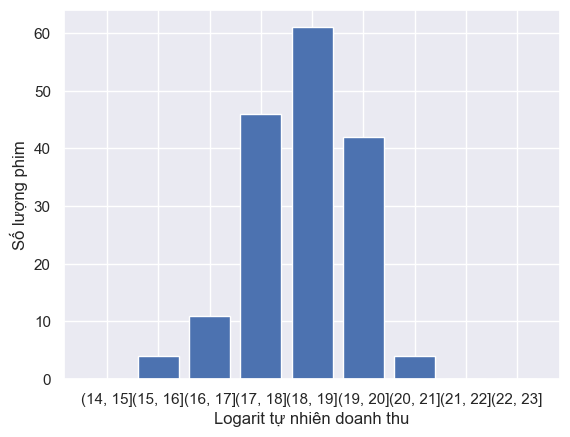

In [ ]:
df["log_revenue"] = np.log(df["domestic_box_office"])

log_bins = [
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
]  

log_categories = pd.cut(df["log_revenue"], log_bins)

log_revenue_counts = log_categories.value_counts()
log_revenue_counts = log_revenue_counts.sort_index()

plt.bar([str(cat) for cat in log_revenue_counts.index], log_revenue_counts)

plt.xlabel("Logarit tự nhiên doanh thu")
plt.ylabel("Số lượng phim")

plt.show()

<Figure size 1000x800 with 0 Axes>

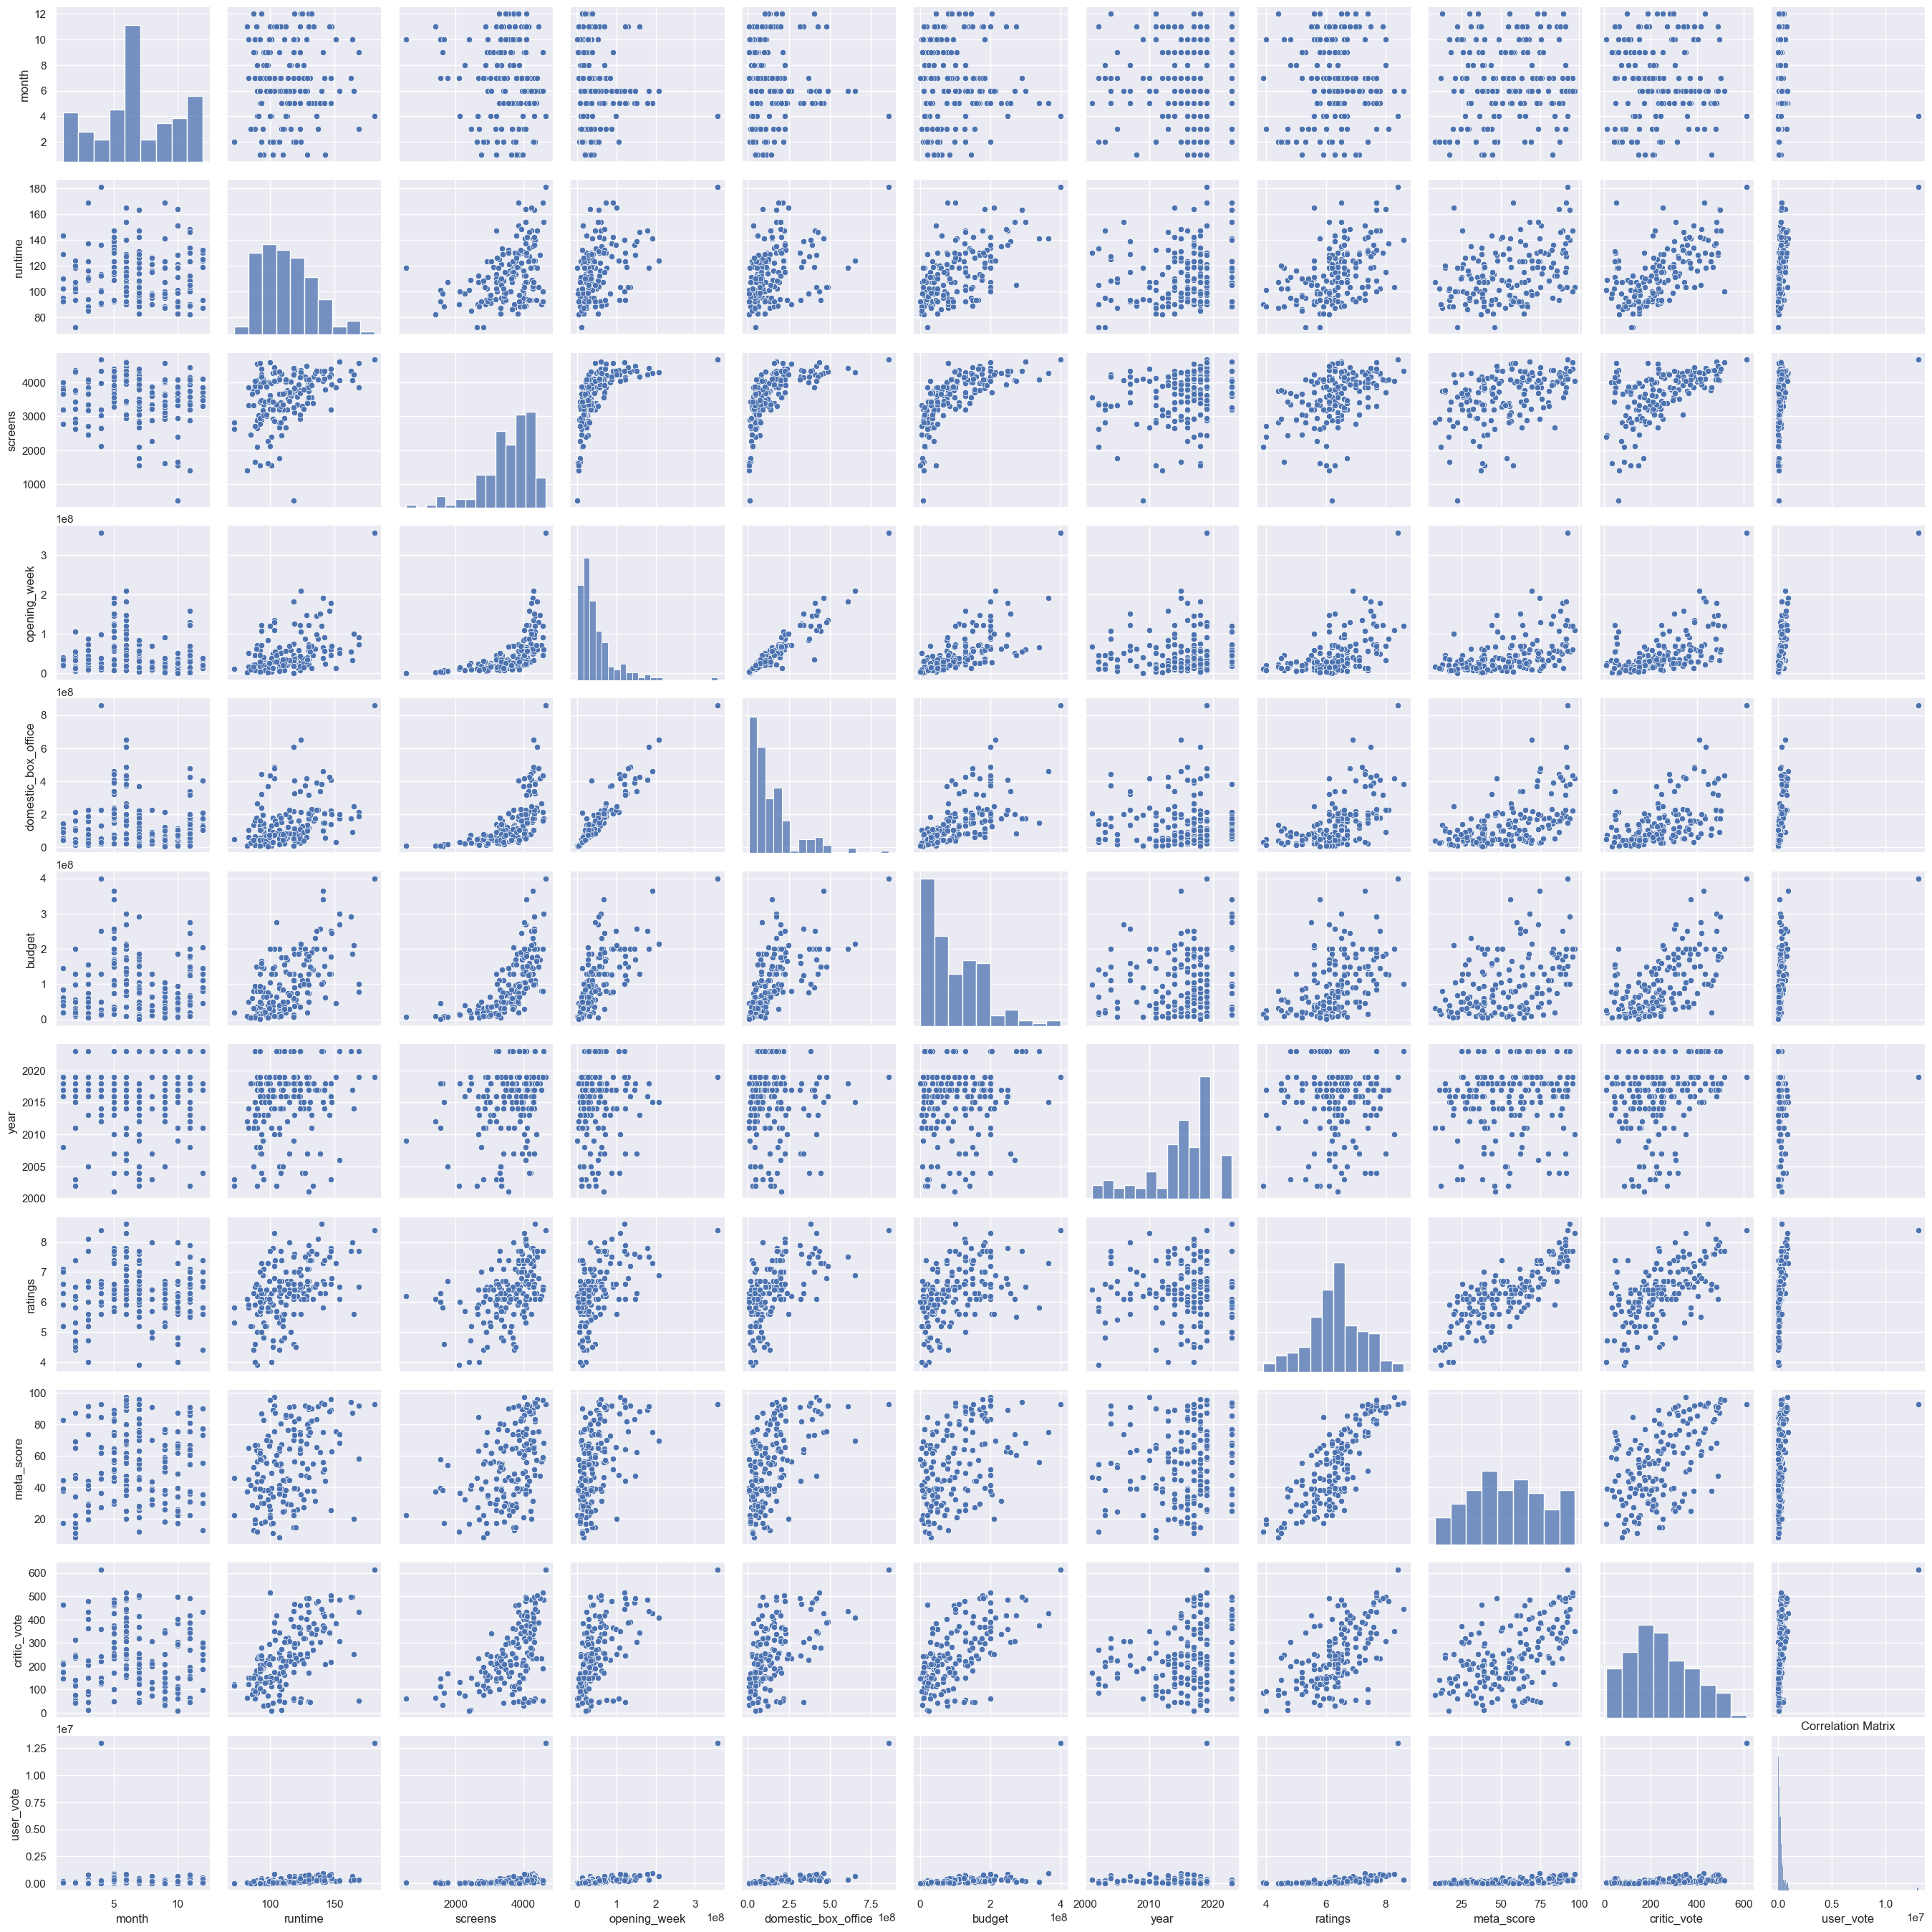

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "month",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "budget",
    "year",
    "ratings",
    "meta_score",
    "critic_vote",
    "user_vote",
]
correlation_matrix = df[columns].corr()

plt.figure(figsize=(16, 12))
sns.pairplot(df[columns])
plt.title("Correlation Matrix")
plt.show()

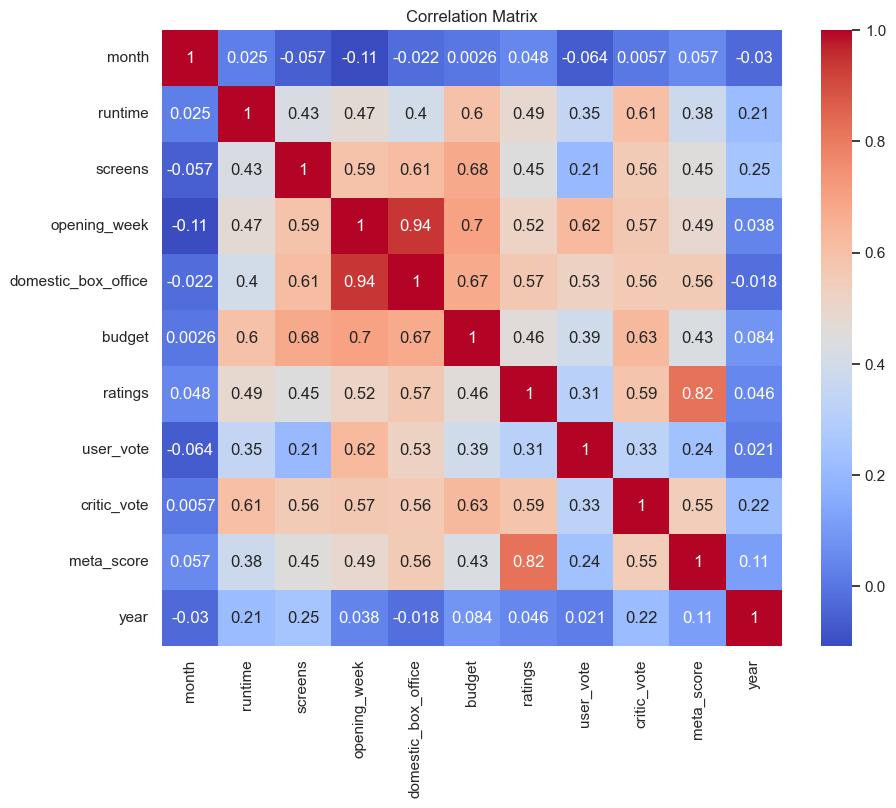

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "month",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "budget",
    "ratings",
    "user_vote",
    "critic_vote",
    "meta_score",
    "year",
]
correlation_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Đọc dữ liệu từ file CSV
data = pd.read_csv("merged_data/final_merged.csv")

# Lựa chọn các cột cần thiết
selected_columns = [
    "month",
    "year",
    "mpaa",
    "budget",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "user_vote",
    "ratings",
    "critic_vote",
    "meta_score",
    "country",
]
data = data[selected_columns]

# Loại bỏ dòng có giá trị NaN
data.dropna(inplace=True)

# Chuyển đổi thuộc tính mpaa và country sang dạng số
label_encoder = LabelEncoder()
data["mpaa"] = label_encoder.fit_transform(data["mpaa"])
data["country"] = label_encoder.fit_transform(data["country"])

# Tạo features và target
X = data.drop("domestic_box_office", axis=1)
y = data["domestic_box_office"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tiền xử lý dữ liệu và áp dụng mô hình Random Forest
numeric_features = [
    "month",
    "year",
    "budget",
    "runtime",
    "screens",
    "opening_week",
    "user_vote",
    "critic_vote",
    "meta_score",
    "ratings",
]
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=150,random_state=42)),
    ]
)

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# tt7329656,rl1526892033,47 Meters Down: Uncaged,PG-13,12000000.0,90.0,2883.0,8427265.0,22260900.0,5.0,31000.0,"United Kingdom, United States",Adventure Drama Horror Thriller,105.0,43.84,1,8.0,2019.0
# tt2294449,rl1581352449,22 Jump Street,R,50000000.0,112.0,3426.0,57071445.0,191719337.0,7.0,407000.0,United States,Action Comedy Crime,268.0,81.77,0,6.0,2014.0


label_encoder = LabelEncoder()


movie1 = {
    "month": 8.0,
    "year": 2019.0,
    "mpaa": "PG-13",
    "budget": 12000000.0,
    "runtime": 89.0,
    "screens": 2853.0,
    "opening_week": 8427265.0,
    "country": "United Kingdom, United States",
    "user_vote": 31000.0,
    "meta_score": 43.84,
    "critic_vote": 105.0,
    "ratings": 5.0,
}

movie = {
    "month": 6.0,
    "year": 2014.0,
    "mpaa": "R",
    "budget": 50000000.0,
    "runtime": 112.0,
    "screens": 3426.0,
    "opening_week": 57071445.0,
    "country": "United States",
    "user_vote": 407000.0,
    "meta_score": 81.77,
    "critic_vote": 268.0,
    "ratings": 7.0,
}

# Chuyển đổi thuộc tính mpaa và country sang dạng số
movie["mpaa"] = label_encoder.fit_transform([movie["mpaa"]])[0]
movie["country"] = label_encoder.fit_transform([movie["country"]])[0]

# Tạo một DataFrame từ dictionary movie
movie_df = pd.DataFrame([movie])

# Tiền xử lý dữ liệu của phim cần dự đoán
numeric_features = [
    "month",
    "year",
    "budget",
    "runtime",
    "screens",
    "opening_week",
    "user_vote",
    "ratings",
    "critic_vote",
    "meta_score",
]
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

# Dự đoán doanh thu của phim
revenue_predict = pipeline.predict(movie_df)

print("Predicted revenue:", revenue_predict)
# Đánh giá mô hình


Mean Squared Error (MSE): 1056643696055481.9
Root Mean Squared Error (RMSE): 32506056.29810362
R^2 Score: 0.8497541775135271
Predicted revenue: [1.86832723e+08]


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv("merged_data/test_data.csv")

# Preprocess the data
# Encode categorical variables if necessary
# Handle missing values if any

# Split the data into features and target variables
# Lựa chọn các cột cần thiết
selected_columns = [
    "month",
    "year",
    "mpaa",
    "budget",
    "runtime",
    "screens",
    "opening_week",
    "country",
    "user_vote",
    "ratings",
    "min_revenue",
    "max_revenue",
]
data = data[selected_columns]

# Loại bỏ dòng có giá trị NaN
data.dropna(inplace=True)

# Chuyển đổi thuộc tính mpaa và country sang dạng số
label_encoder = LabelEncoder()
data["mpaa"] = label_encoder.fit_transform(data["mpaa"])
data["country"] = label_encoder.fit_transform(data["country"])
y_min = data["min_revenue"]
y_max = data["max_revenue"]
X = data.drop(["min_revenue", "max_revenue"], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(
    X, y_min, y_max, test_size=0.2, random_state=42
)

# Train the Random Forest models
min_revenue_model = RandomForestRegressor(n_estimators=100, random_state=42)
min_revenue_model.fit(X_train, y_min_train)

max_revenue_model = RandomForestRegressor(n_estimators=100, random_state=42)
max_revenue_model.fit(X_train, y_max_train)

# Evaluate the models
min_revenue_pred = min_revenue_model.predict(X_test)
max_revenue_pred = max_revenue_model.predict(X_test)

min_revenue_mse = mean_squared_error(y_min_test, min_revenue_pred)
min_revenue_r2 = r2_score(y_min_test, min_revenue_pred)

max_revenue_mse = mean_squared_error(y_max_test, max_revenue_pred)
max_revenue_r2 = r2_score(y_max_test, max_revenue_pred)

min_rmse = np.sqrt(min_revenue_mse)
max_rmse = np.sqrt(max_revenue_mse)

print(f"Min Revenue Model: MSE={min_rmse:.2f}, R-squared={min_revenue_r2:.2f}")
print(f"Max Revenue Model: MSE={max_rmse:.2f}, R-squared={max_revenue_r2:.2f}")

# Use the models to make predictions
label_encoder = LabelEncoder()

movie = {
    "month": 5.0,
    "year": 2017.0,
    "mpaa": "PG-13",
    "budget": 5300000.0,
    "runtime": 89.0,
    "screens": 2270.0,
    "opening_week": 11205562.0,
    "country": "United States",
    "user_vote": 5.6,
    "ratings": 61000.0,
}
# Chuyển đổi thuộc tính mpaa và country sang dạng số
movie["mpaa"] = label_encoder.fit_transform([movie["mpaa"]])[0]
movie["country"] = label_encoder.fit_transform([movie["country"]])[0]
print (movie)
new_movie_df = pd.DataFrame([movie])
min_revenue_pred = min_revenue_model.predict(new_movie_df)
max_revenue_pred = max_revenue_model.predict(new_movie_df)

print(f"Predicted min revenue: {min_revenue_pred[0]:.2f}")
print(f"Predicted max revenue: {max_revenue_pred[0]:.2f}")

Min Revenue Model: MSE=21648962.26, R-squared=0.91
Max Revenue Model: MSE=26094040.00, R-squared=0.91
{'month': 5.0, 'year': 2017.0, 'mpaa': 0, 'budget': 5300000.0, 'runtime': 89.0, 'screens': 2270.0, 'opening_week': 11205562.0, 'country': 0, 'user_vote': 5.6, 'ratings': 61000.0}
Predicted min revenue: 48142566.40
Predicted max revenue: 58369963.28


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Đọc dữ liệu từ file CSV
data = pd.read_csv("merged_data/final_merged.csv")

# Lựa chọn các cột cần thiết
selected_columns = [
    "month",
    "year",
    "mpaa",
    "budget",
    "runtime",
    "opening_week",
    "screens",
    "critic_vote",
    "meta_score",
    "country",
]
data = data[selected_columns]

# Loại bỏ dòng có giá trị NaN
data.dropna(inplace=True)

# Chuyển đổi thuộc tính mpaa và country sang dạng số
label_encoder = LabelEncoder()
data["mpaa"] = label_encoder.fit_transform(data["mpaa"])
data["country"] = label_encoder.fit_transform(data["country"])

# Tạo features và target
y = data["opening_week"]

X = data.drop("opening_week", axis=1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tiền xử lý dữ liệu và áp dụng mô hình Random Forest
numeric_features = [
    "month",
    "year",
    "budget",
    "runtime",
    "screens",
    "critic_vote",
    "meta_score",
]
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=150,random_state=42)),
    ]
)

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# tt7329656,rl1526892033,47 Meters Down: Uncaged,PG-13,12000000.0,90.0,2883.0,8427265.0,22260900.0,5.0,31000.0,"United Kingdom, United States",Adventure Drama Horror Thriller,105.0,43.84,1,8.0,2019.0
# tt2294449,rl1581352449,22 Jump Street,R,50000000.0,112.0,3426.0,57071445.0,191719337.0,7.0,407000.0,United States,Action Comedy Crime,268.0,81.77,0,6.0,2014.0


label_encoder = LabelEncoder()


movie1 = {
    "month": 8.0,
    "year": 2019.0,
    "mpaa": "PG-13",
    "budget": 12000000.0,
    "runtime": 89.0,
    "screens": 2853.0,
    "country": "United Kingdom, United States",
    "meta_score": 43.84,
    "critic_vote": 105.0,
}

movie = {
    "month": 6.0,
    "year": 2014.0,
    "mpaa": "R",
    "budget": 50000000.0,
    "runtime": 112.0,
    "screens": 3426.0,
    "country": "United States",
    "meta_score": 81.77,
    "critic_vote": 268.0,
}

# Chuyển đổi thuộc tính mpaa và country sang dạng số
movie["mpaa"] = label_encoder.fit_transform([movie["mpaa"]])[0]
movie["country"] = label_encoder.fit_transform([movie["country"]])[0]

# Tạo một DataFrame từ dictionary movie
movie_df = pd.DataFrame([movie])

# Tiền xử lý dữ liệu của phim cần dự đoán
numeric_features = [
    "month",
    "year",
    "budget",
    "runtime",
    "screens",
    "critic_vote",
    "meta_score",
]
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

# Dự đoán doanh thu của phim
revenue_predict = pipeline.predict(movie_df)

print("Predicted revenue:", revenue_predict)
# Đánh giá mô hình


Mean Squared Error (MSE): 184596114643369.25
Root Mean Squared Error (RMSE): 13586615.27546023
R^2 Score: 0.7018177431356156
Predicted revenue: [32659284.]
